![](images/CustomerChrun.png)

## <div style='color: Magenta'> Business Understaning </div>
**Customer churn** , also known as customer attrition, is when customer chooses to stop using the  products or services of the company and stops the relationship.

**Objective:** 
    The primary objective is to identify the factors that contribute to customer churn and make a predictive model that can forecast if the customers are likely to leave.

## <div style='color: Magenta'> Data Understaning </div>
The dataset used is Telecom churn datasets (customer_churn_dataset-training-master.csv and customer_churn_dataset-testing-master.csv) from <a href="https://www.kaggle.com/datasets/">Kaggle</a>
<p>The datasets together contains about 500K rows and 12 feature columns including target feature:<br></P>
<P><b>Input Variables:<b></P>
<ul>
    <li><b>CustomerID:</b> Unique identifier for a customer</li>
    <li><b>Age:</b> Age of the customer</li>
    <li><b>Gender:</b> Gender of the customer</li>
    <li><b>Tenure:</b> Duration in months for which a customer has been using the company's products/services</li>
    <li><b>Usage Frequency:</b> Number of times the customer has used the company’s services in the last month</li>
    <li><b>Support Calls:</b> Number of calls the customer has made to the customer support in the last month</li>
    <li><b>Payment Delay:</b> Number of days the customer has delayed their payment in the last month</li>
    <li><b>Subscription Type:</b> Type of subscription choosen by the customer</li>
    <li><b>Contract Length:</b> Contract duration that the customer has signed with the company</li>
    <li><b>Total Spend:</b> Total amount the customer has spent on the company's products or services</li>
    <li><b>Last Interaction:</b> Number of days since the customer had the last interaction with the company</li>
</ul>
<P><b>Output Variable:<b></P>
<ul>
    <li><b>Churn:</b> Binary label indicating whether a customer has churned (1) or not (0) </li> <br>
</ul>


### Import Module Libraries

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import time

# data vizualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,4)
plt.style.use("fivethirtyeight")

# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# model
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

print("All modules loaded")

All modules loaded


### Adjust settings

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Import Data

In [11]:
# There were two datasets already split into Training and Tesing. Merging them into one and will split later randomly during processing

df = pd.concat(
    [
        pd.read_csv('data/customer_churn_dataset-training-master.csv'),
        pd.read_csv('data/customer_churn_dataset-testing-master.csv')
    ], axis=0)
df.reset_index(drop=True, inplace=True)
df_orig = df.copy()
df.shape

(505207, 12)

In [12]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.00,30.00,Female,39.00,14.00,5.00,18.00,Standard,Annual,932.00,17.00,1.00
1,3.00,65.00,Female,49.00,1.00,10.00,8.00,Basic,Monthly,557.00,6.00,1.00
2,4.00,55.00,Female,14.00,4.00,6.00,18.00,Basic,Quarterly,185.00,3.00,1.00
3,5.00,58.00,Male,38.00,21.00,7.00,7.00,Standard,Monthly,396.00,29.00,1.00
4,6.00,23.00,Male,32.00,20.00,5.00,8.00,Basic,Monthly,617.00,20.00,1.00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505207 entries, 0 to 505206
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.3+ MB


### Data Cleaning

**Clean the column names if required**

In [16]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'], dtype='object')

In [17]:
# replace space with _ and make all lower case

df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.columns

Index(['customerid', 'age', 'gender', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'subscription_type', 'contract_length', 'total_spend', 'last_interaction', 'churn'], dtype='object')

**Missing Value Check**

In [19]:
df.isnull().sum()

customerid           1
age                  1
gender               1
tenure               1
usage_frequency      1
support_calls        1
payment_delay        1
subscription_type    1
contract_length      1
total_spend          1
last_interaction     1
churn                1
dtype: int64

In [20]:
# Removing the missing row as there is only a single row
df.dropna(inplace=True)

**Duplicate Check**

In [22]:
sum(df.duplicated())

0

**Drop unwanted columns**

In [24]:
# CustomerID has no impact on the analysis and can be dropped
df.drop(columns=['customerid'], inplace = True)
df

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30.00,Female,39.00,14.00,5.00,18.00,Standard,Annual,932.00,17.00,1.00
1,65.00,Female,49.00,1.00,10.00,8.00,Basic,Monthly,557.00,6.00,1.00
2,55.00,Female,14.00,4.00,6.00,18.00,Basic,Quarterly,185.00,3.00,1.00
3,58.00,Male,38.00,21.00,7.00,7.00,Standard,Monthly,396.00,29.00,1.00
4,23.00,Male,32.00,20.00,5.00,8.00,Basic,Monthly,617.00,20.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
505202,45.00,Female,33.00,12.00,6.00,21.00,Basic,Quarterly,947.00,14.00,1.00
505203,37.00,Male,6.00,1.00,5.00,22.00,Standard,Annual,923.00,9.00,1.00
505204,25.00,Male,39.00,14.00,8.00,30.00,Premium,Monthly,327.00,20.00,1.00
505205,50.00,Female,18.00,19.00,7.00,22.00,Standard,Monthly,540.00,13.00,1.00


In [25]:
# It would be good to convert few datatype to integer as they are discrete and will be good in chart display

discrete_cols = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'last_interaction', 'churn']
for col in discrete_cols:
    df[col] = df[col].astype(int)
df


,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30,Female,39,14,5,18,Standard,Annual,932.00,17,1
1,65,Female,49,1,10,8,Basic,Monthly,557.00,6,1
2,55,Female,14,4,6,18,Basic,Quarterly,185.00,3,1
3,58,Male,38,21,7,7,Standard,Monthly,396.00,29,1
4,23,Male,32,20,5,8,Basic,Monthly,617.00,20,1
...,...,...,...,...,...,...,...,...,...,...,...
505202,45,Female,33,12,6,21,Basic,Quarterly,947.00,14,1
505203,37,Male,6,1,5,22,Standard,Annual,923.00,9,1
505204,25,Male,39,14,8,30,Premium,Monthly,327.00,20,1
505205,50,Female,18,19,7,22,Standard,Monthly,540.00,13,1


## <div style='color: Magenta'> Exploratory Data Analysis (EDA) </div>

In [27]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [28]:
df.describe()

,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction,churn
count,505206.00,505206.00,505206.00,505206.00,505206.00,505206.00,505206.00,505206.00
mean,39.70,31.35,15.71,3.83,13.50,620.07,14.61,0.56
std,12.67,17.24,8.62,3.13,8.45,245.32,8.61,0.50
min,18.00,1.00,1.00,0.00,0.00,100.00,1.00,0.00
25%,29.00,16.00,8.00,1.00,6.00,446.00,7.00,0.00
50%,40.00,32.00,16.00,3.00,13.00,648.90,14.00,1.00
75%,49.00,46.00,23.00,6.00,20.00,824.00,22.00,1.00
max,65.00,60.00,30.00,10.00,30.00,1000.00,30.00,1.00


In [29]:
df.describe(include=['object', 'category'])

,gender,subscription_type,contract_length
count,505206,505206,505206
unique,2,3,3
top,Male,Standard,Annual
freq,280273,170630,198608


In [30]:
df['churn'].value_counts()

churn
1    280492
0    224714
Name: count, dtype: int64

In [31]:
df['gender'].value_counts()

gender
Male      280273
Female    224933
Name: count, dtype: int64

In [32]:
df['contract_length'].value_counts()

contract_length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64

In [33]:
df['subscription_type'].value_counts()

subscription_type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64

In [34]:
df_analysis=df.convert_dtypes()
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505206 entries, 0 to 505206
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   age                505206 non-null  Int32  
 1   gender             505206 non-null  string 
 2   tenure             505206 non-null  Int32  
 3   usage_frequency    505206 non-null  Int32  
 4   support_calls      505206 non-null  Int32  
 5   payment_delay      505206 non-null  Int32  
 6   subscription_type  505206 non-null  string 
 7   contract_length    505206 non-null  string 
 8   total_spend        505206 non-null  Float64
 9   last_interaction   505206 non-null  Int32  
 10  churn              505206 non-null  Int32  
dtypes: Float64(1), Int32(7), string(3)
memory usage: 36.6 MB


In [35]:
df_analysis.shape

(505206, 11)

In [36]:
df['total_spend'].describe()

count   505206.00
mean       620.07
std        245.32
min        100.00
25%        446.00
50%        648.90
75%        824.00
max       1000.00
Name: total_spend, dtype: float64

In [37]:
df.shape

(505206, 11)

### Outlier Treatment

In [39]:
iqr = df['total_spend'].quantile(.75) - df['total_spend'].quantile(.25)
iqr

378.0

In [40]:
lower_bound = df['total_spend'].quantile(.25) - 1.5 * iqr
upper_bound = df['total_spend'].quantile(.75) + 1.5 * iqr
df_iqr = df[(df['total_spend'] > lower_bound) & (df['total_spend'] < upper_bound)].copy()

In [41]:
iqr_data_lost = 1-(df_iqr.shape[0]/df.shape[0])
print("We lost {:.2%} of the data by the IQR method".format(iqr_data_lost))

We lost 0.00% of the data by the IQR method


In [42]:
df_iqr.shape

(505206, 11)

In [43]:
df_iqr['total_spend'].describe()

count   505206.00
mean       620.07
std        245.32
min        100.00
25%        446.00
50%        648.90
75%        824.00
max       1000.00
Name: total_spend, dtype: float64

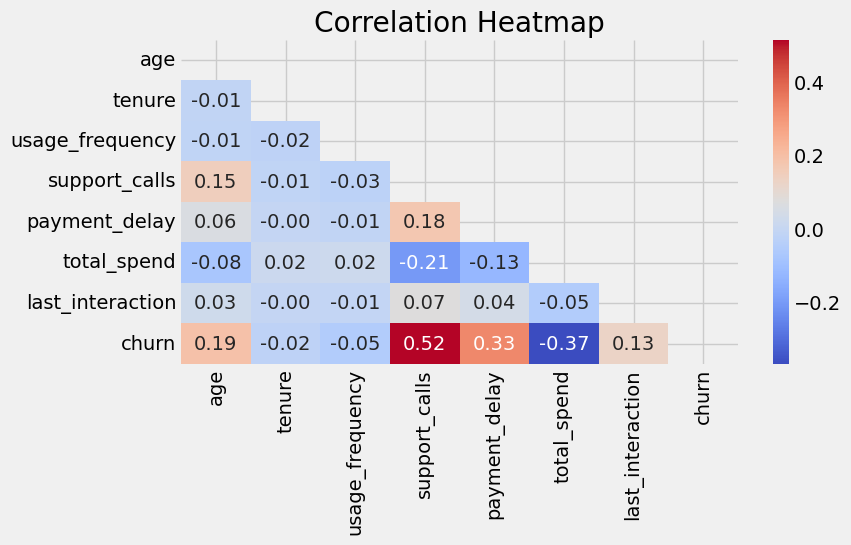

In [44]:
# Heatmap (Triangular) on numerical features

corr = df_iqr.corr(numeric_only = True)
mask = np.triu(np.ones_like(df_iqr.corr(numeric_only = True)))
# corr = df_iqr.corr(numeric_only = True)
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot = True, fmt=".2f", mask=mask, cmap="coolwarm")
#plt.xticks(rotation=60)
plt.savefig("images/CorrelationHeatmap.png",bbox_inches = 'tight')
plt.show()

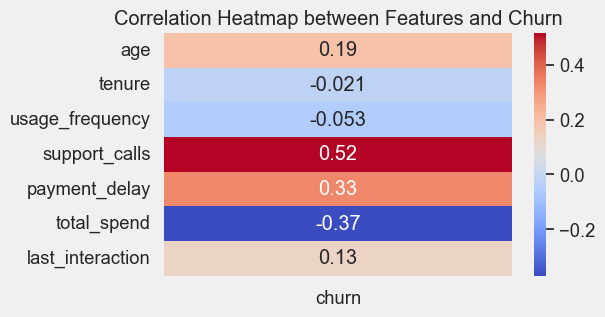

In [45]:
# Create a heatmap to show relationship between features and churn

corr = df_iqr.select_dtypes(include=['number']).corr().loc[:'last_interaction', 'churn']
plt.figure(figsize=(5, 3))
sns.set(font_scale=1.2)
sns.heatmap(corr.to_frame(), annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap between Features and Churn")
plt.savefig("images/CorrelationHeatmapWRTChurn.png",bbox_inches = 'tight')

plt.show()

### Univariate Analysis

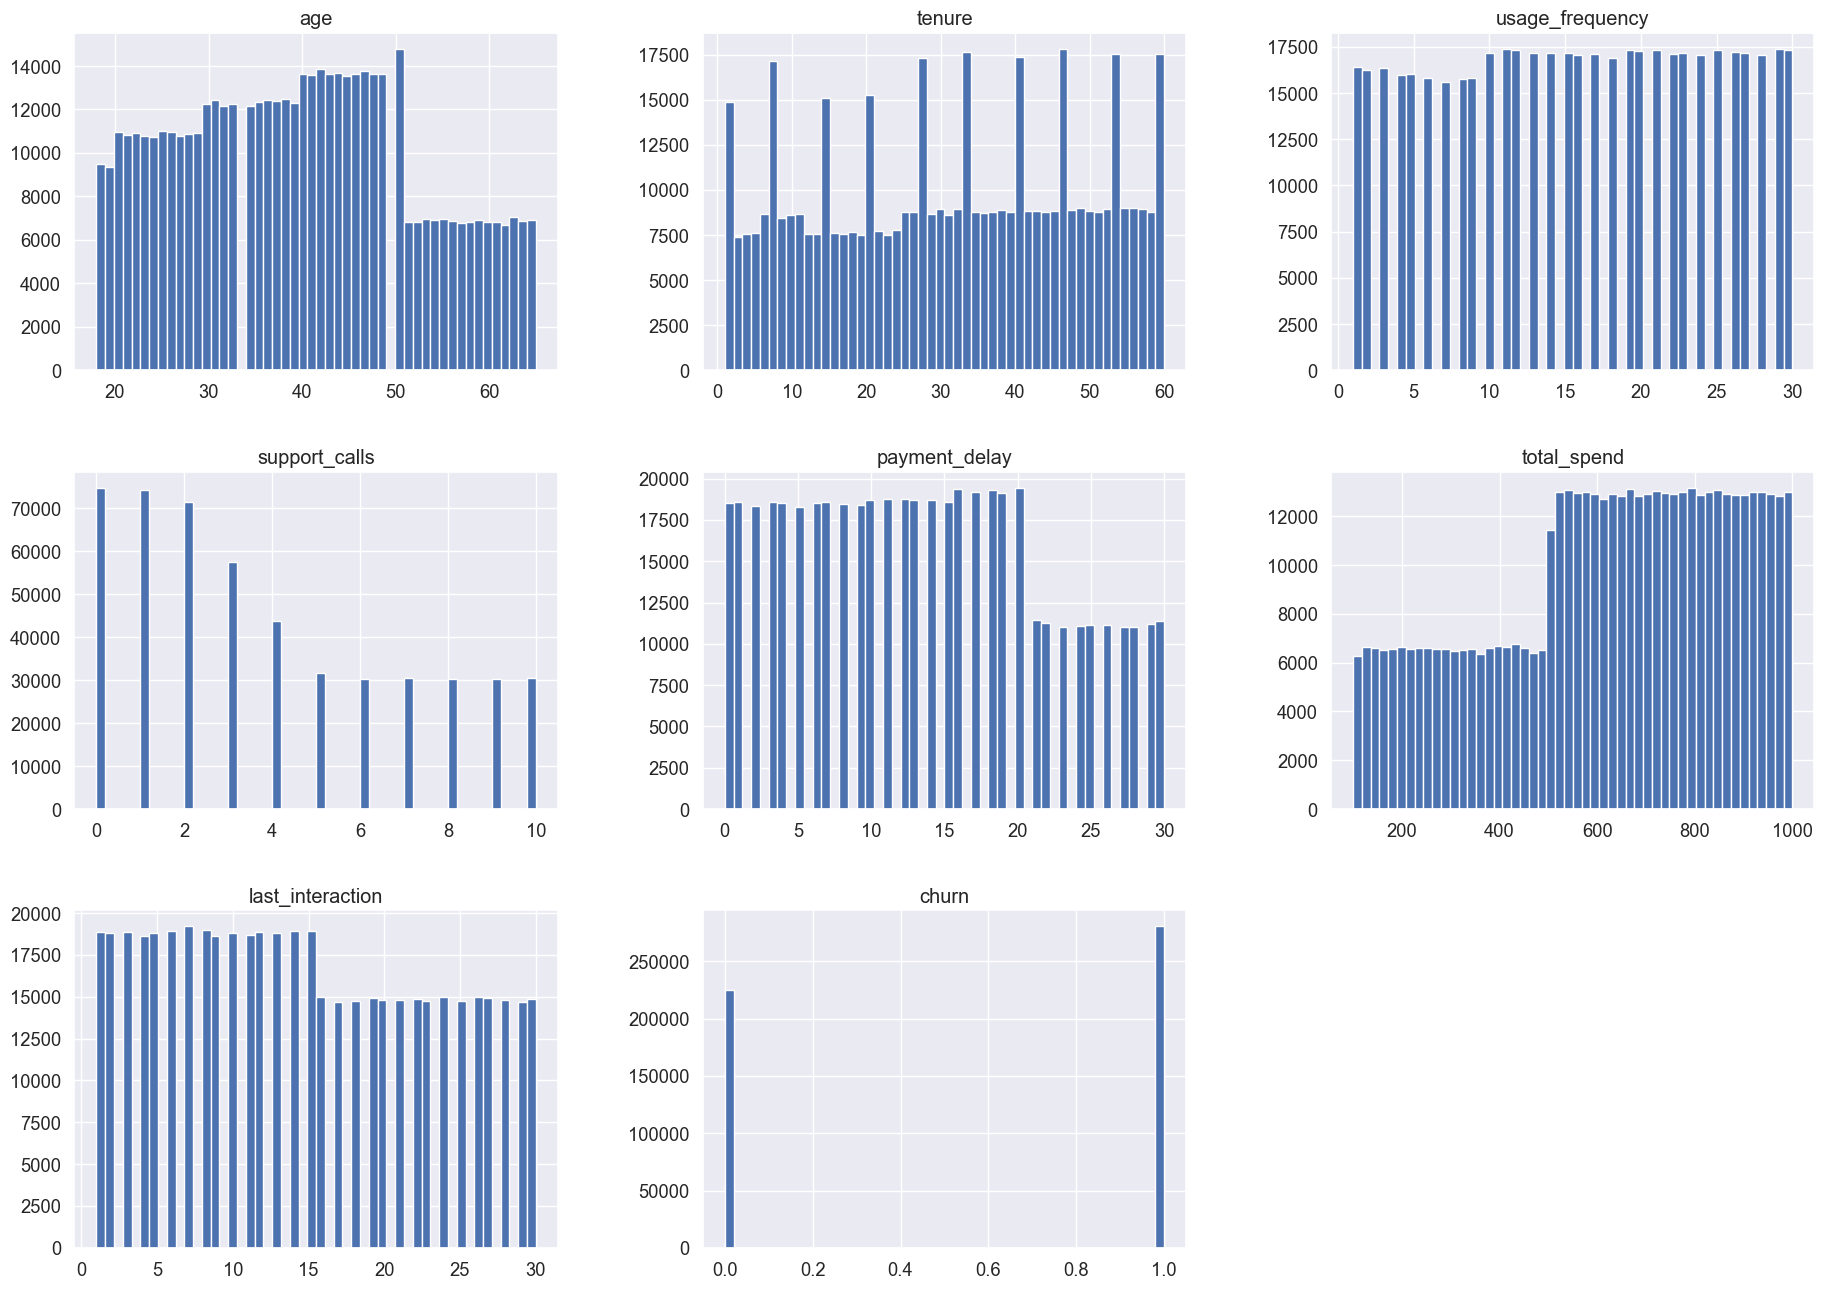

In [47]:
# Histogram for numerical variables
df.select_dtypes(include=np.number).hist(bins=50, figsize=(20,15))
plt.savefig("images/Histograms.png",bbox_inches = 'tight')
plt.show()

<div style='background-color: Lavender; color: DarkBlue'> <b> << Insights >></Insights> </b> </div>
<div style='background-color: Lavender'>
<br>
    
**age:** Fair to say that the data is evenly distributed, with some peaks in the age group of 30-50 and a sharp decline over 60.

**tenure:** The service usage duration is evenly spread from 0 to 60 months. A significant number of customers have used the service for more than 30 months.

**usage_frequency:** Most customers maintain a stable usage pattern.

**support_calls:** The number of support calls gradually decreases between 0 to 10 times. Most customers make few support calls (with the majority calling fewer than 3 times). There are a few cases where customers call very frequently.

**payment_delay:** Most customers have payment delays (between 0 to 20 days), but the delay is significant (more than 20 days) for certain number of customers.

**total_spend:** Total spending lies between 0 to 1000. Most customers spend more than 500.

**last_interaction:** Most customers have interacted between 0 to 14 days, but there are notable number of customers who interacted between 16-30 days.

<br>
</div>

In [49]:
# sns.pairplot(df, hue='churn')
# plt.show()

In [50]:
plt.rcParams["figure.figsize"] = (8,4)
plt.style.use("fivethirtyeight")

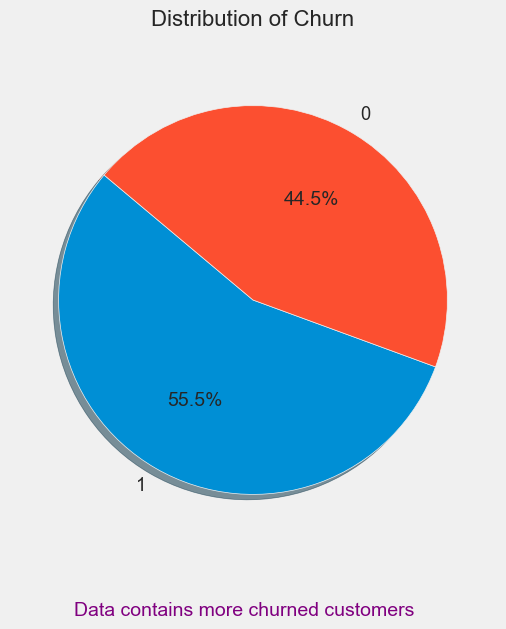

In [51]:
# Draw a pie chart
plt.figure(figsize=(6,6))
churn_count = df['churn'].value_counts()
plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of Churn\n', fontsize=16)
plt.figtext(0.5, -0.05, "Data contains more churned customers", ha="center", fontsize=14, color="purple")
plt.savefig("images/DistributionOfChurn.png",bbox_inches = 'tight')
plt.show()

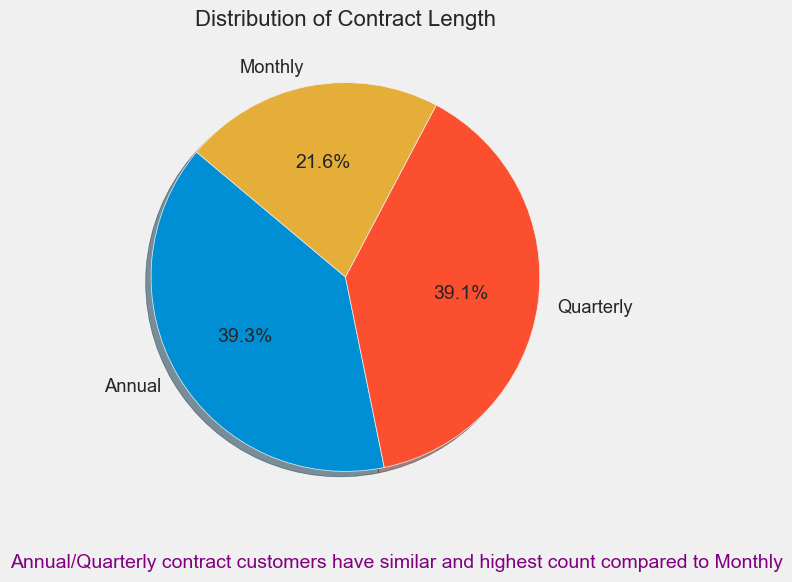

In [52]:
# Draw a pie chart
plt.figure(figsize=(6,6))
cl_count = df['contract_length'].value_counts()
plt.pie(cl_count, labels=cl_count.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of Contract Length', fontsize=16)
plt.figtext(0.6, -0.01, "Annual/Quarterly contract customers have similar and highest count compared to Monthly", 
            ha="center", fontsize=14, color="purple")
plt.savefig("images/DistributionOfContractLength.png",bbox_inches = 'tight')
plt.show()

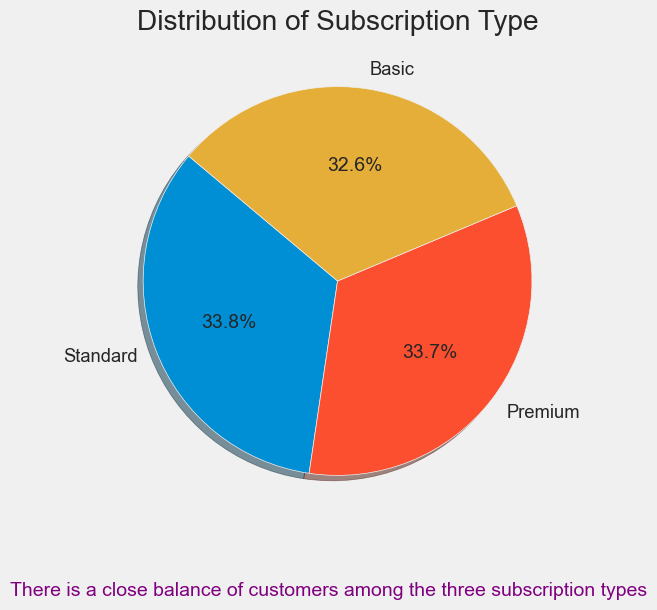

In [53]:
# Draw a pie chart
plt.figure(figsize=(6,6))
subType_count = df['subscription_type'].value_counts()
plt.pie(subType_count, labels=subType_count.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Distribution of Subscription Type')
plt.figtext(0.5, -0.05, "There is a close balance of customers among the three subscription types", ha="center", fontsize=14, color="purple")
plt.savefig("images/DistributionOfSubscriptionType.png",bbox_inches = 'tight')
plt.show()

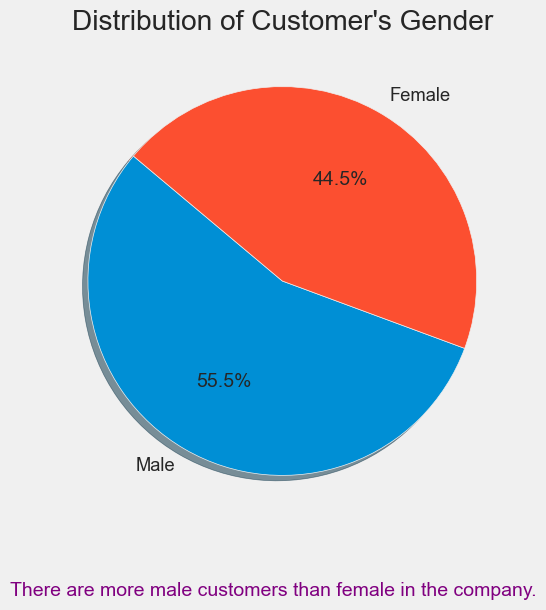

In [54]:
# Draw a pie chart
plt.figure(figsize=(6,6))
gender_count = df['gender'].value_counts()
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title(f"Distribution of Customer's Gender")
plt.figtext(0.5, -0.05, "There are more male customers than female in the company.", ha="center", fontsize=14, color="purple")
plt.savefig("images/DistributionOfGender.png",bbox_inches = 'tight')
plt.show()

### Bivariate/Multivariate Analysis

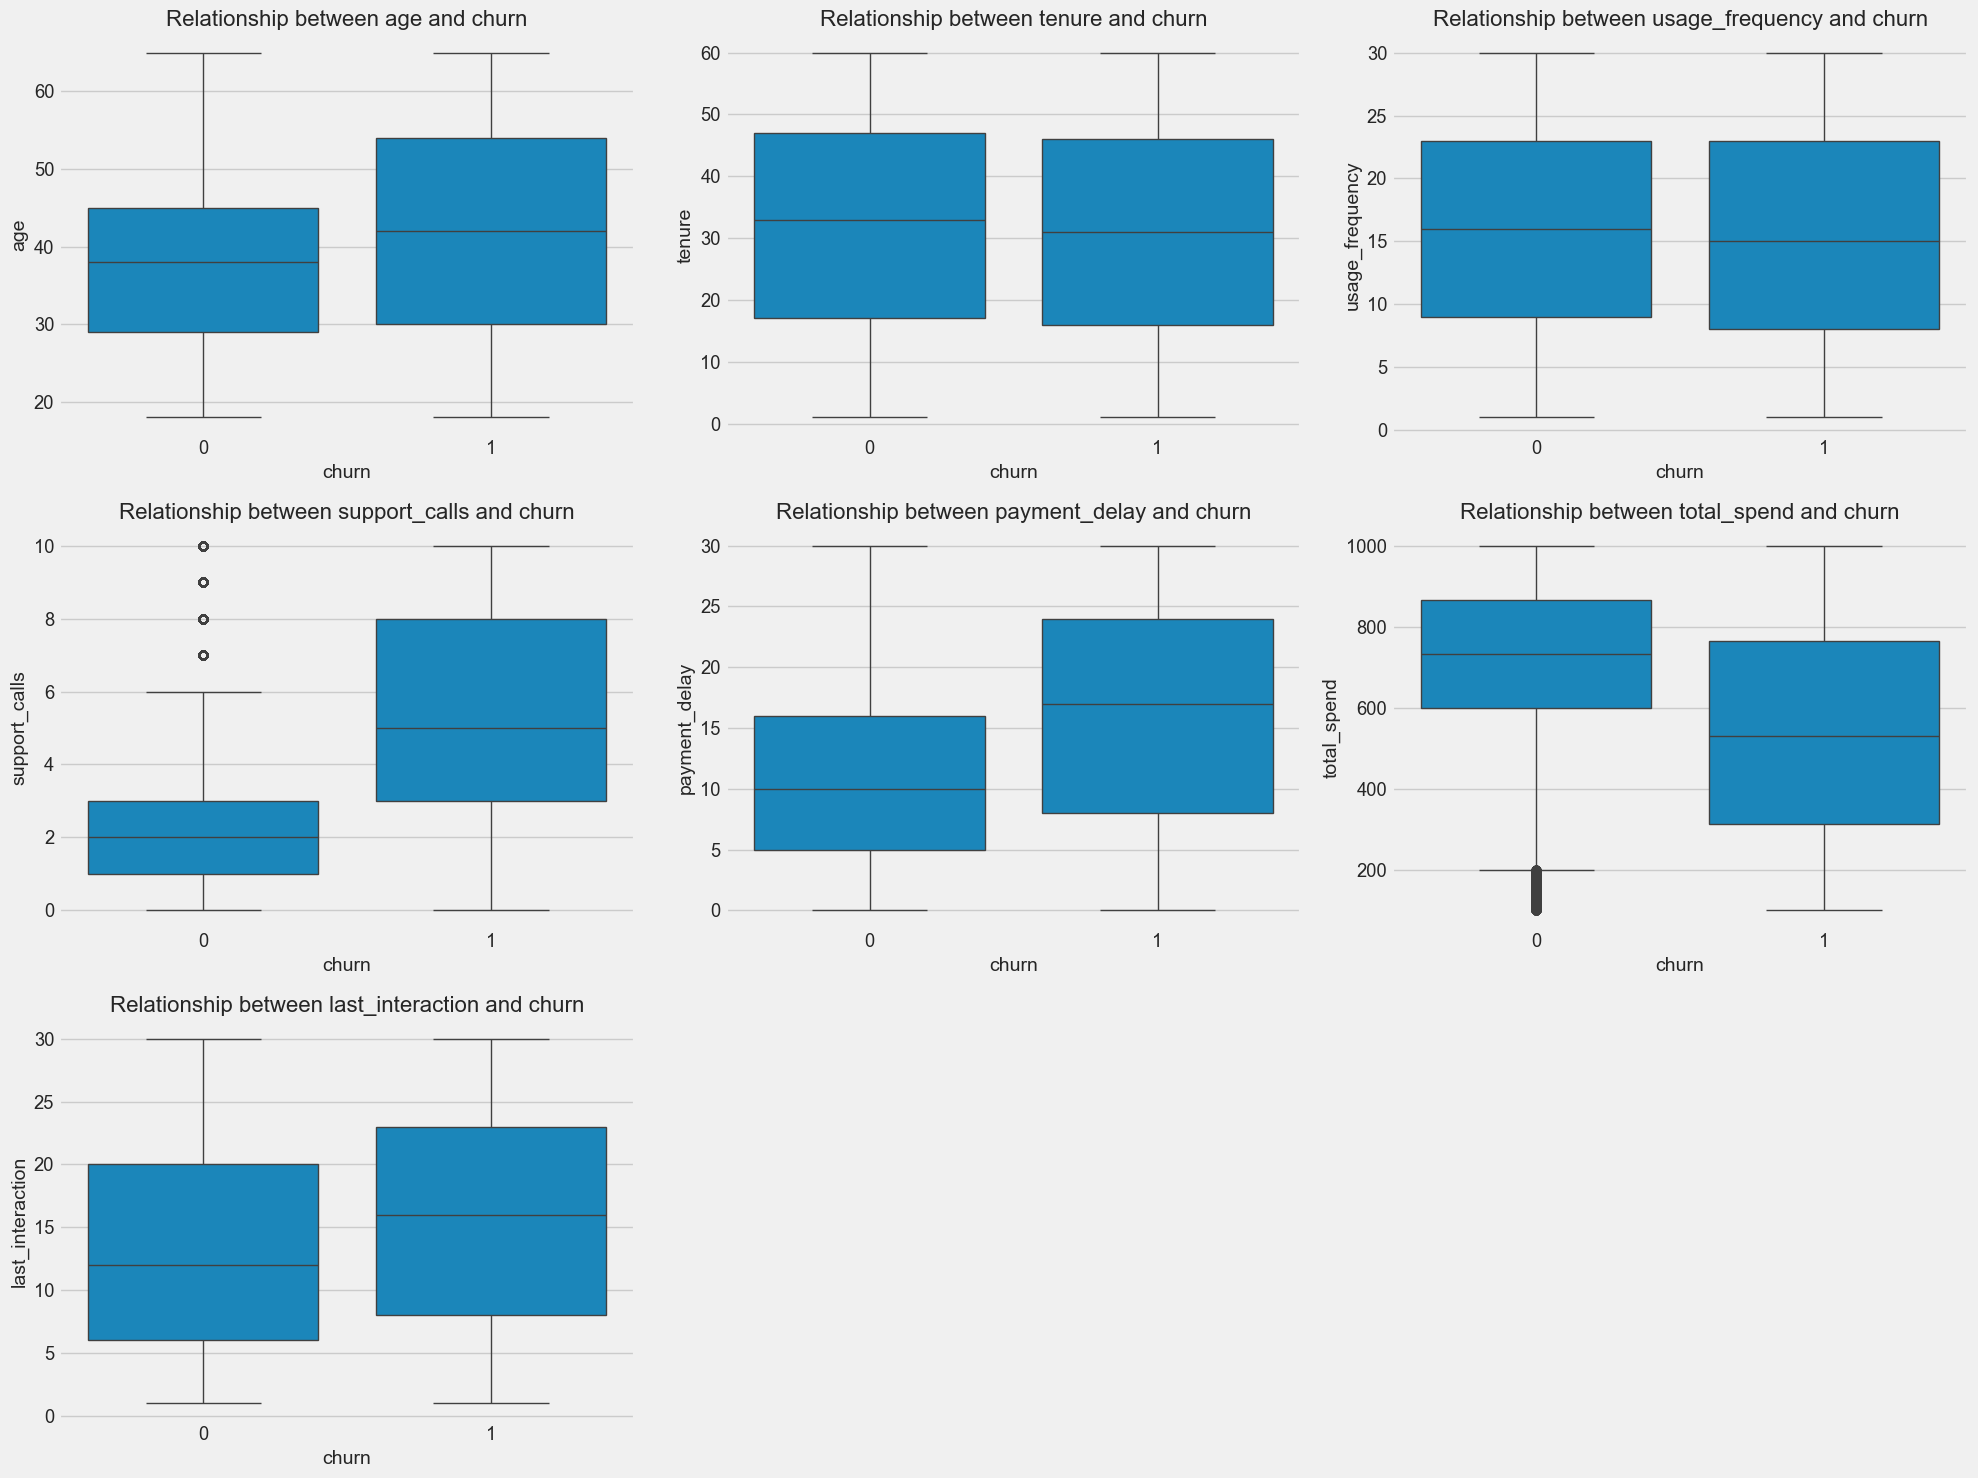

In [56]:
# Create subplots for numerical variables and their relationship with 'Churn'

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

numerical_cols = ['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'total_spend', 'last_interaction']

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='churn', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Relationship between {col} and churn', fontsize=16)
    axes[i].set_xlabel('churn', fontsize=14)
    axes[i].set_ylabel(col, fontsize=14)

# Remove empty subplots if any
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("images/BoxplotsFeaturesVSChurn.png",bbox_inches = 'tight')
plt.show()


<div style='background-color: Lavender; color: DarkBlue'> <b> << Insights >></Insights> </b> </div>
<div style='background-color: Lavender'>
<br>
    
* The Churn group has a wider age distribution. The median age is around 45 years old where as the meadian is around 40 for non_churn group. Though older customers (45+ years old) tend to churn, it maynot be the deciding factor. Age should be considered with other factors.

* Customers who use the service less or have less recent interaction are more likely to churn as they may be dissatisfied with the service/support.

* Customers who have higher payment delay or low spending are likely to churn.

* Customers who make higher support calls are most likely to churn. Churning customers make more than 5 support calls.

* Tenure does not seem to have any direct relationship with churn

We can take closer look at the high contributing factor next.

<br>
</div>

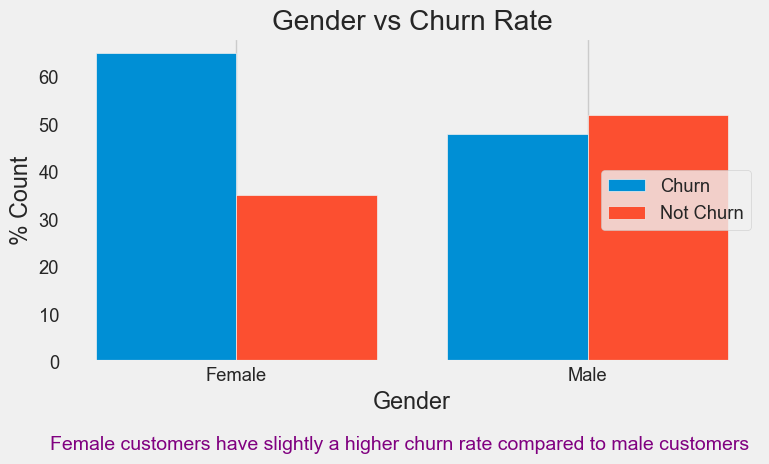

In [58]:
gender_churn = df.groupby(['gender', 'churn']).size().unstack()
gender_churn_percentage = gender_churn.div(gender_churn.sum(axis=1), axis=0) * 100  # Convert to %


X = list(gender_churn_percentage.index)
churn_0 = list(gender_churn_percentage.iloc[:, 0])
churn_1 = list(gender_churn_percentage.iloc[:, 1])
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X)
plt.xlabel('Gender')
plt.ylabel('% Count')
plt.title("Gender vs Churn Rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.figtext(0.5, -0.15, "Female customers have slightly a higher churn rate compared to male customers", ha="center", fontsize=14, color="purple")
plt.savefig("images/GenderVSChurn.png",bbox_inches = 'tight')
plt.show()

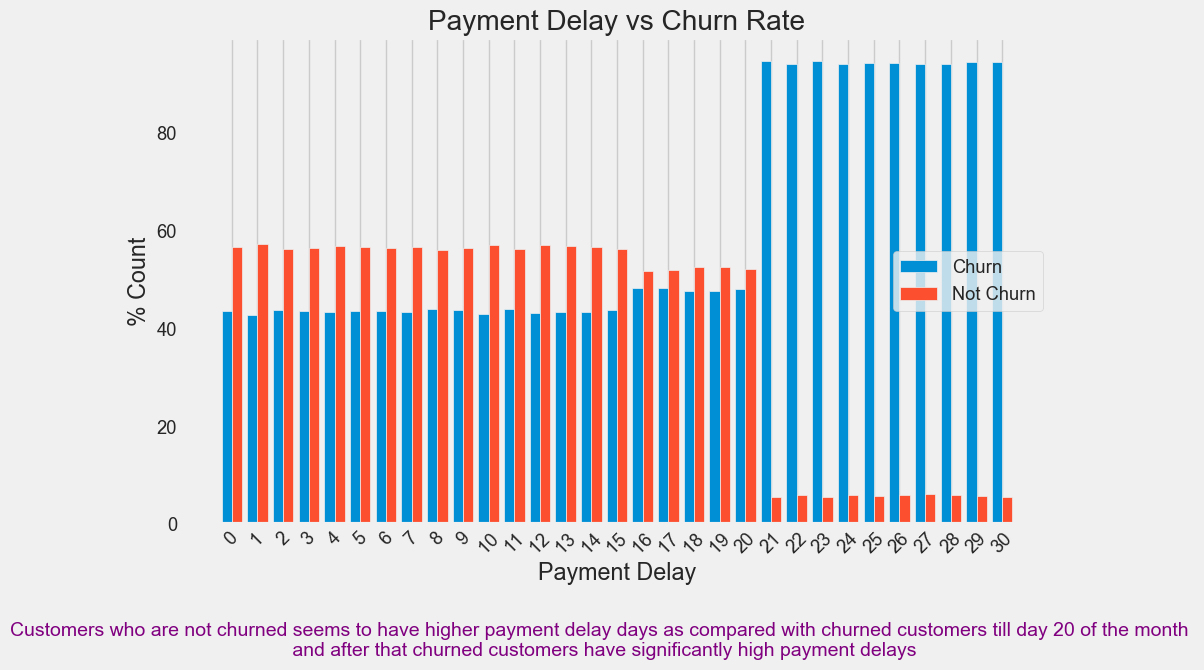

In [59]:
paydelay_churn = df.groupby(['payment_delay', 'churn']).size().unstack()
paydelay_churn_percentage = paydelay_churn.div(paydelay_churn.sum(axis=1), axis=0) * 100  # Convert to %

X = list(paydelay_churn_percentage.index)
churn_0 = list(paydelay_churn_percentage.iloc[:, 0])
churn_1 = list(paydelay_churn_percentage.iloc[:, 1])
X_axis = np.arange(len(X))
plt.figure(figsize=(10,6)) 
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Payment Delay')
plt.ylabel('% Count')
plt.title("Payment Delay vs Churn Rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.figtext(0.5, -0.15, "Customers who are not churned seems to have higher payment delay days as compared with churned customers " \
    "till day 20 of the month \n and after that churned customers have significantly high payment delays", ha="center", fontsize=14, color="purple")
plt.savefig("images/PaymentDelayVSChurn.png",bbox_inches = 'tight')
plt.show()

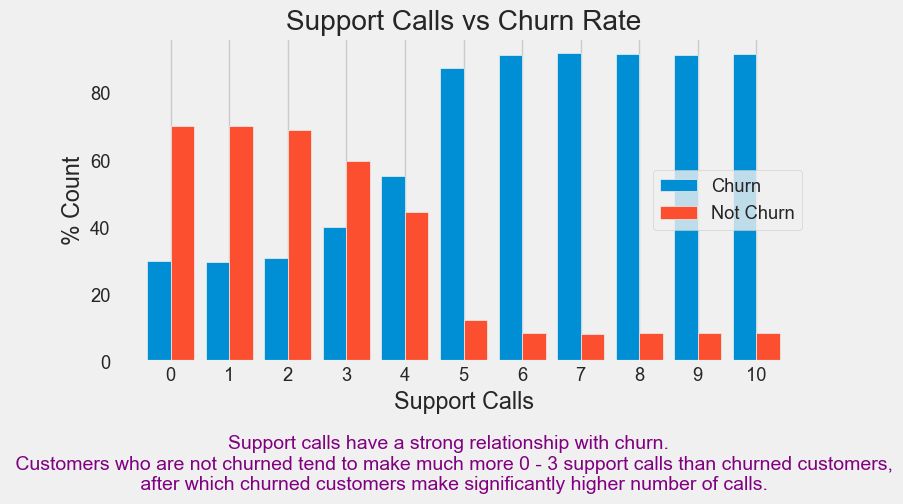

In [60]:
support_calls_churn = df.groupby(['support_calls', 'churn']).size().unstack()
sup_call_churn_percentage = support_calls_churn.div(support_calls_churn.sum(axis=1), axis=0) * 100  # Convert to %

X = list(sup_call_churn_percentage.index)
churn_0 = list(sup_call_churn_percentage.iloc[:, 0])
churn_1 = list(sup_call_churn_percentage.iloc[:, 1])
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')
  
plt.xticks(X_axis, X)
plt.xlabel('Support Calls')
plt.ylabel('% Count')
plt.title("Support Calls vs Churn Rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.figtext(0.5, -0.25, "Support calls have a strong relationship with churn. \n Customers who are not churned tend to make much" \
    " more 0 - 3 support calls than churned customers,\n after which churned customers make significantly higher number of calls.", 
            ha="center", fontsize=14, color="purple")
plt.savefig("images/SupportCallsVSChrun.png",bbox_inches = 'tight')
plt.show()

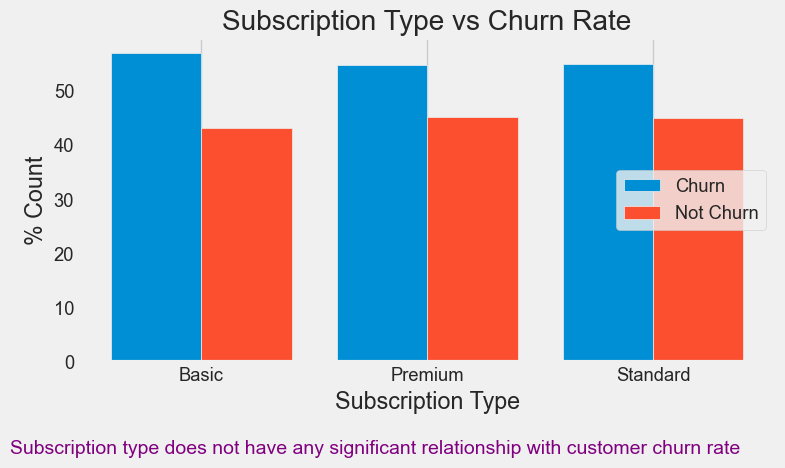

In [61]:
subscription_type_churn = df.groupby(['subscription_type', 'churn']).size().unstack()
sub_type_churn_percentage = subscription_type_churn.div(subscription_type_churn.sum(axis=1), axis=0) * 100  # Convert to %

X = list(sub_type_churn_percentage.index)
churn_0 = list(sub_type_churn_percentage.iloc[:, 0])
churn_1 = list(sub_type_churn_percentage.iloc[:, 1])
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')

plt.xticks(X_axis, X)
plt.xlabel('Subscription Type')
plt.ylabel('% Count')
plt.title("Subscription Type vs Churn Rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.figtext(0.45, -0.16, "Subscription type does not have any significant relationship with customer churn rate", ha="center", fontsize=14, color="purple")
plt.savefig("images/SubscriptionTypeVSChurn.png",bbox_inches = 'tight')
plt.show()

## <div style='color: Magenta'> Data Pre-processing </div>

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

### Train-Test Split

In [65]:
# Define the features (X) and the target variable (y)
X = df.drop(columns=['churn'])  # Here we are removing the target column
y = df['churn']  # This is our target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
X_train.head()

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction
166878,48,Male,57,8,2,11,Basic,Annual,885.00,16
347477,33,Male,43,13,0,1,Basic,Quarterly,684.44,23
254093,37,Male,26,18,1,5,Basic,Quarterly,778.02,6
146324,27,Male,44,4,4,13,Standard,Monthly,502.00,8
300200,35,Male,56,2,0,1,Standard,Quarterly,603.26,27


In [67]:
# Check missing Value count

print(X_train.isna().sum())
print("========================")
print(X_test.isna().sum())

age                  0
gender               0
tenure               0
usage_frequency      0
support_calls        0
payment_delay        0
subscription_type    0
contract_length      0
total_spend          0
last_interaction     0
dtype: int64
age                  0
gender               0
tenure               0
usage_frequency      0
support_calls        0
payment_delay        0
subscription_type    0
contract_length      0
total_spend          0
last_interaction     0
dtype: int64


In [68]:
# Select numerical as well as categorical columns

numerical_cols = X_train.select_dtypes(include=['int','int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object','string']).columns.tolist()
print(numerical_cols)
print(categorical_cols)

['age', 'tenure', 'usage_frequency', 'support_calls', 'payment_delay', 'total_spend', 'last_interaction']
['gender', 'subscription_type', 'contract_length']


In [69]:
# Create a preprocessor that applies both imputation and scaling to numerical columns and one-hot encoding to categorical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputation using the mean
            ('scaler', StandardScaler())  # Standardization of numerical columns
        ]), numerical_cols),  # Pipeline for numerical columns

        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encoding for categorical columns
    ])

In [70]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [71]:
# The names of the numerical columns remain unchanged after the transformation
numerical_col_names = numerical_cols

# The method get_feature_names_out generates the names of the new columns created by OneHotEncoder for the categorical columns
categorical_col_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine the names of numerical and categorical columns into a single list
all_column_names = list(categorical_col_names) + list(numerical_col_names)

# Convert the matrix into a DataFrame with the column names
X_train_scaled = pd.DataFrame(X_train_processed, columns=all_column_names)

X_train_scaled.head()

,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction
0,0.66,1.49,-0.89,-0.59,-0.30,1.08,0.16,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00
1,-0.53,0.68,-0.31,-1.22,-1.48,0.26,0.97,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
2,-0.21,-0.31,0.27,-0.90,-1.01,0.64,-1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
3,-1.00,0.73,-1.36,0.05,-0.06,-0.48,-0.77,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00
4,-0.37,1.43,-1.59,-1.22,-1.48,-0.07,1.44,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00


In [72]:
# Convert the matrix into a DataFrame with the column names

X_test_scaled = pd.DataFrame(X_test_processed, columns=all_column_names)
X_test_scaled.head()

,gender_Female,gender_Male,subscription_type_Basic,subscription_type_Premium,subscription_type_Standard,contract_length_Annual,contract_length_Monthly,contract_length_Quarterly,age,tenure,usage_frequency,support_calls,payment_delay,total_spend,last_interaction
0,1.13,-1.53,0.50,-0.90,-1.24,-0.81,0.04,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
1,1.76,0.39,1.42,1.01,-0.65,-0.18,-0.42,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
2,0.34,-0.89,0.61,-0.90,-0.30,0.70,-1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
3,-1.40,1.49,-0.43,-0.59,-0.77,-0.12,-0.88,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
4,-1.24,-0.31,-1.59,0.05,1.12,0.78,-0.07,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00


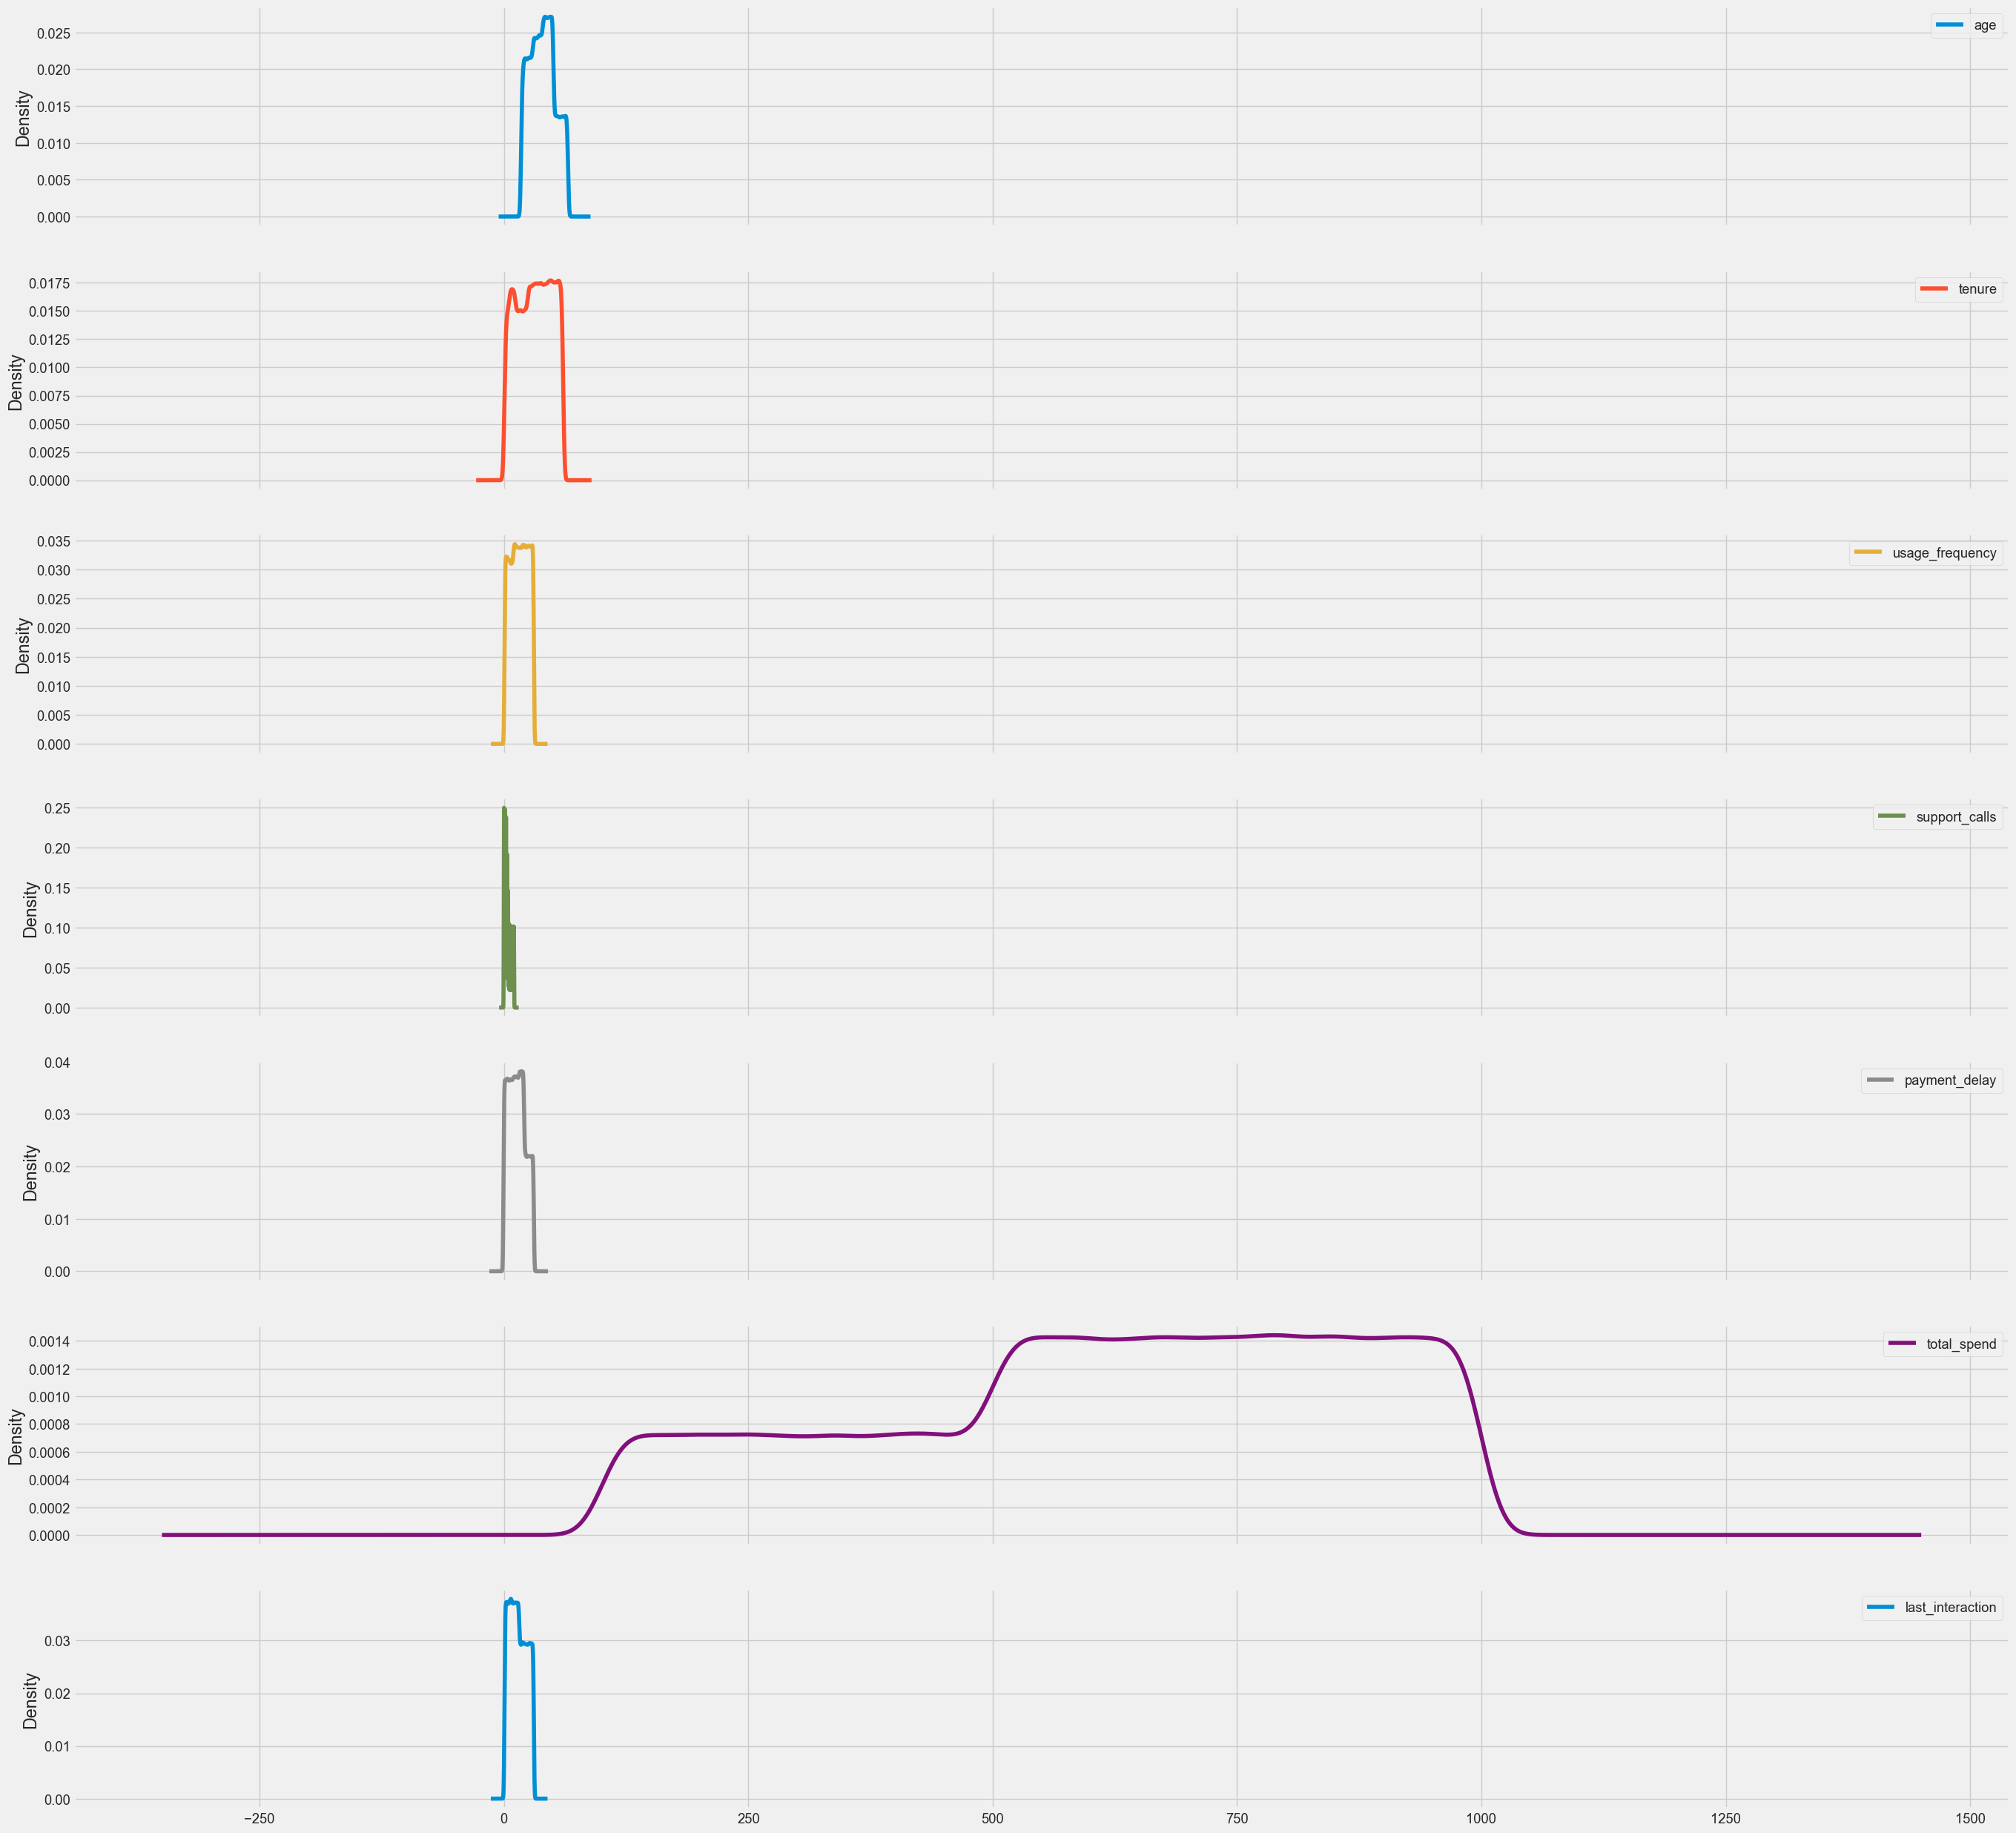

In [73]:
# KDE Plot to view the density (before scaling)

X_train.plot(kind = 'kde', subplots = True, figsize = (30, 30));
plt.savefig("images/KDE_X_train.png",bbox_inches = 'tight')
plt.show()

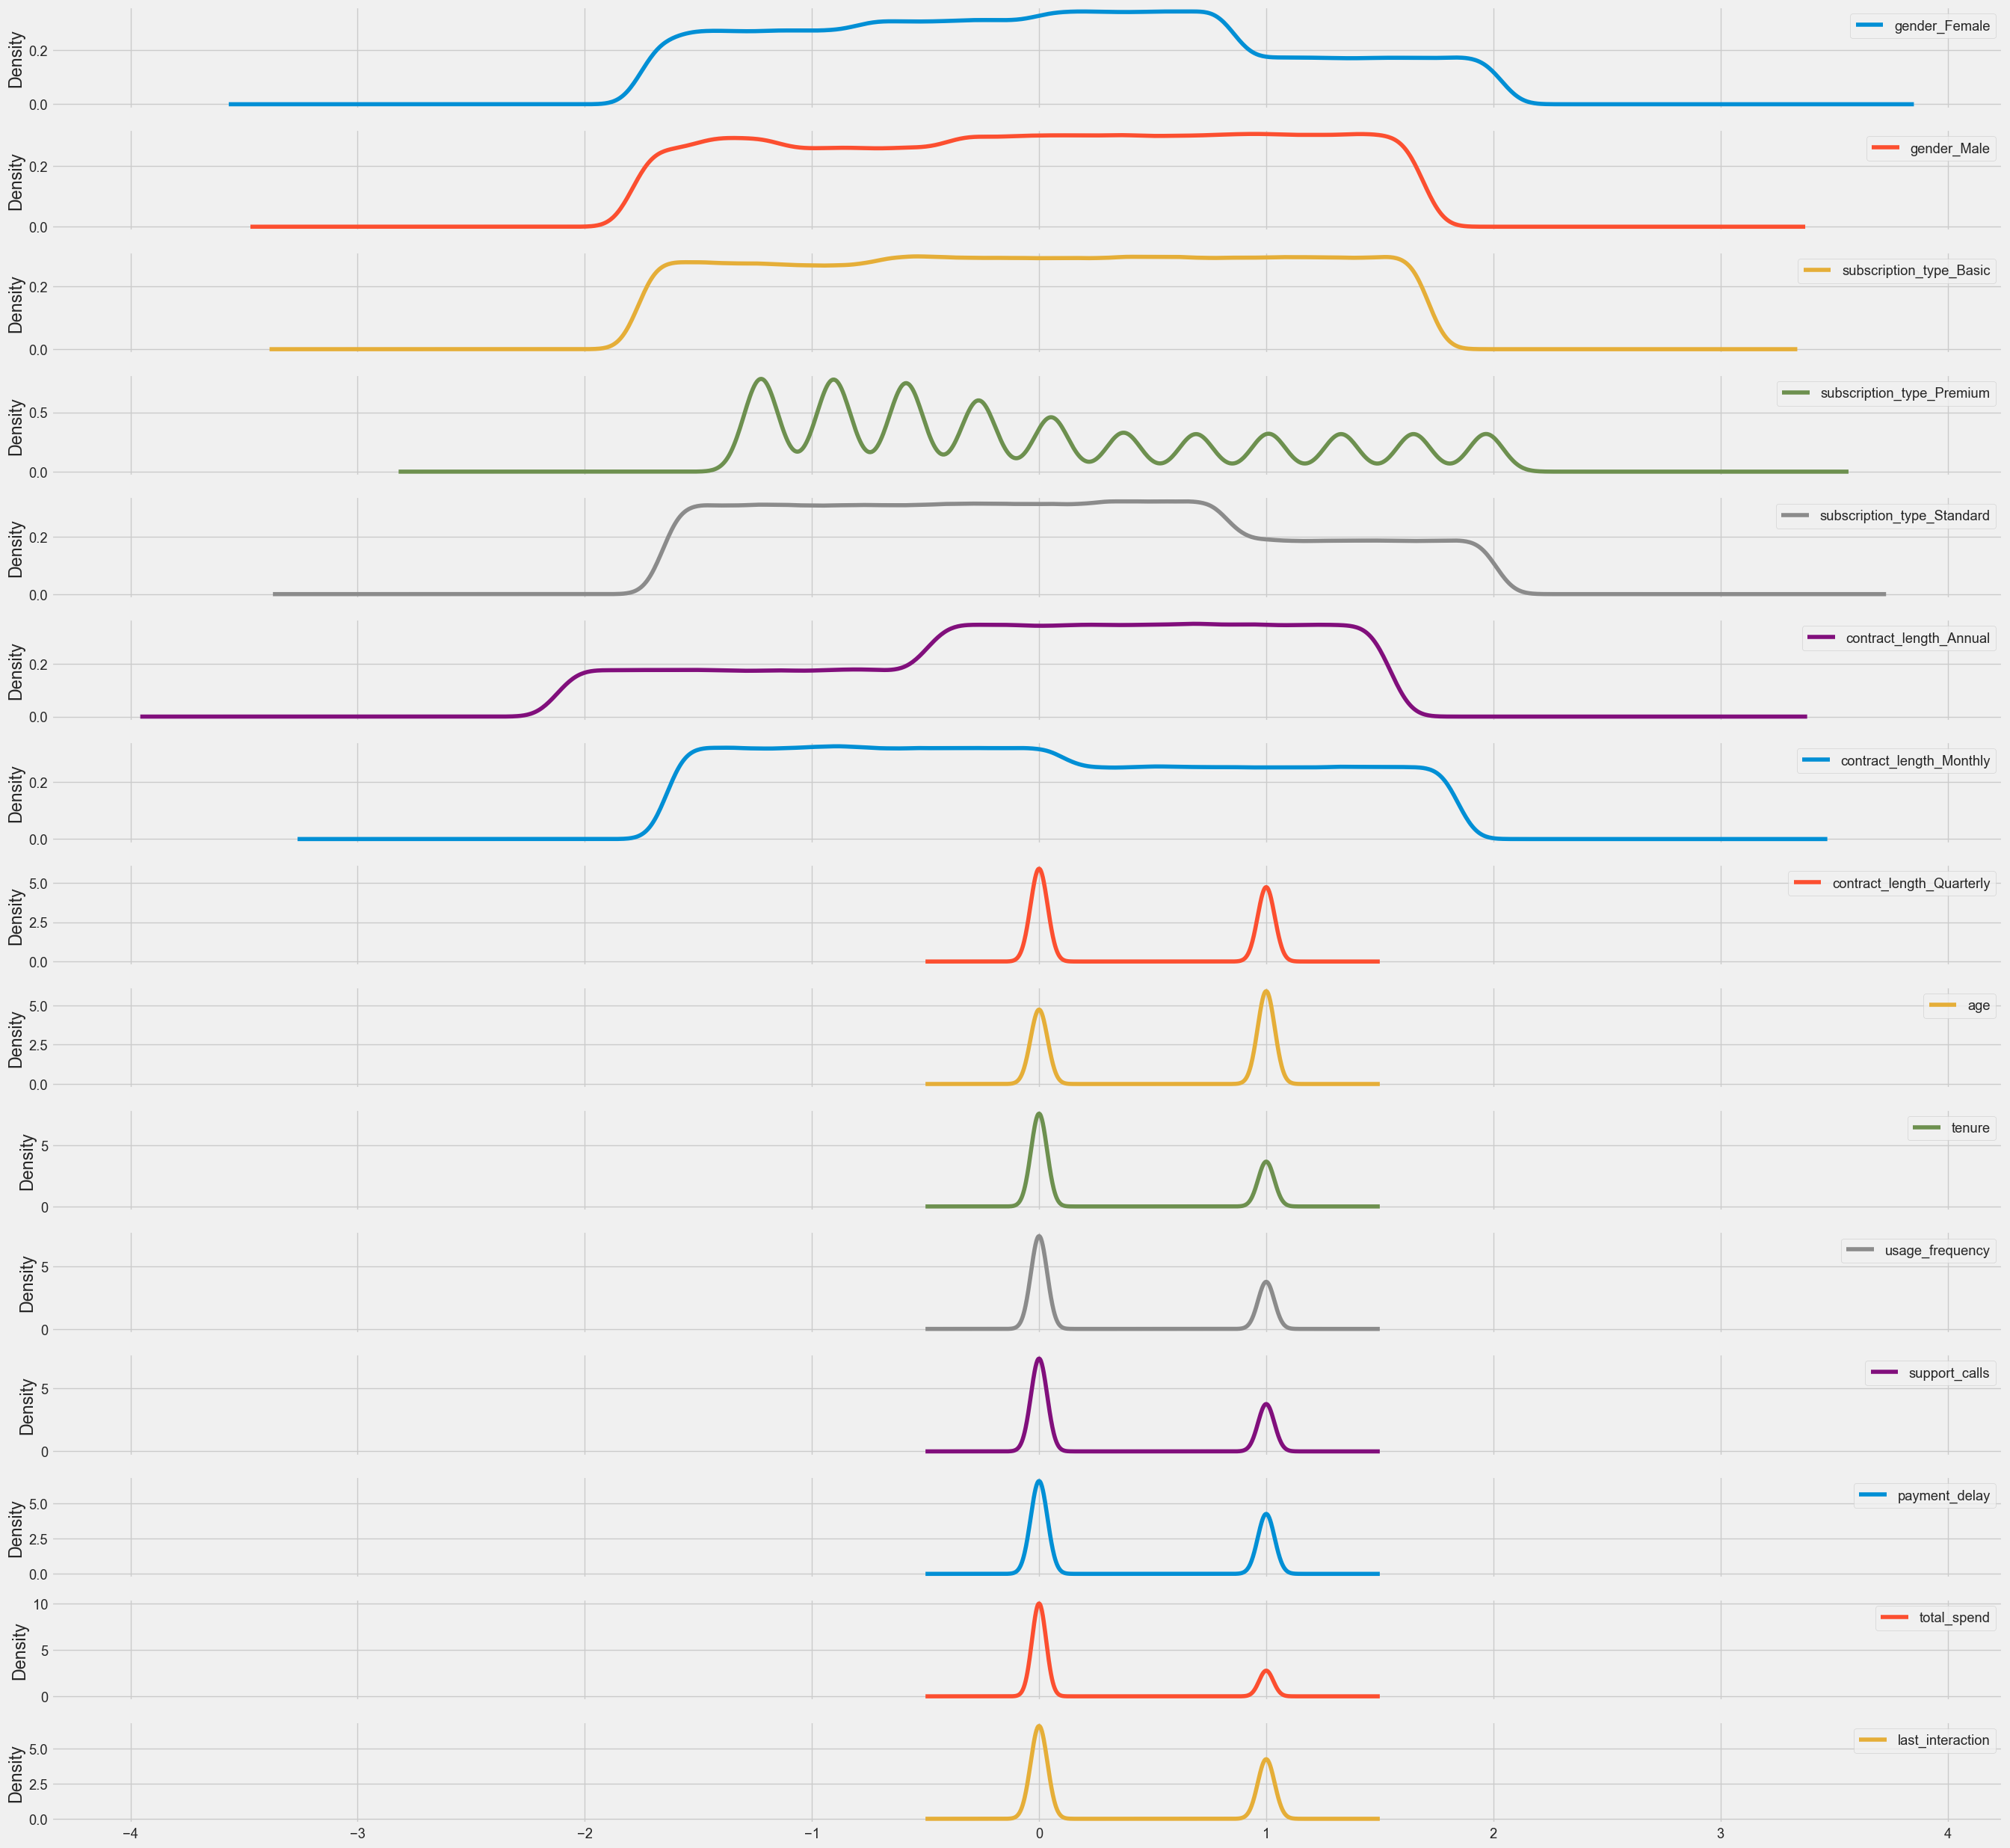

In [74]:
# KDE Plot to view the density (after scaling)

X_train_scaled.plot(kind = 'kde', subplots = True, figsize = (30, 30));
plt.savefig("images/KDE_X_train_scaled.png",bbox_inches = 'tight')
plt.show()

## <div style='color: Magenta'> Dummy Classifier (Baseline Model) </div>

In [76]:
# Create a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# Train the dummy classifier
dummy.fit(X_train, y_train)

# Get the baseline performance for the training set
y_pred_train = dummy.predict(X_train)
baseline_train = accuracy_score(y_train, y_pred_train)

# Get the baseline performance for the test set
y_pred_test = dummy.predict(X_test)
baseline_test = accuracy_score(y_test, y_pred_test)

print(f'Baseline accuracy for training set: {baseline_train * 100:.2f}%')
print(f'Baseline accuracy for test set: {baseline_test * 100:.2f}%')

Baseline accuracy for training set: 55.53%
Baseline accuracy for test set: 55.48%


## <div style='color: Magenta'>A Simple Model (to compare with Dummy Classifier) </div>

In [78]:
# Create a Logistic Regression model and train the model
model_logreg = LogisticRegression()
model_logreg.fit(X_train_scaled, y_train)

# Predict on the training/test data
y_train_pred = model_logreg.predict(X_train_scaled)
y_test_pred = model_logreg.predict(X_test_scaled)

In [79]:
# Calculate the accuracy score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 84.93%
Test Accuracy: 84.60%


## <div style='color: Magenta'>Classification Models </div>

In [81]:
# pip install xgboost

In [82]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [83]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Xgboost": XGBClassifier(random_state=42),    
    "SVM_SGD": SGDClassifier(loss="hinge", random_state=42)
    #"SVM": SVC(kernel="linear", random_state=42)
}


Processing Logistic Regression ...
	Model: Logistic Regression
	Accuracy: 0.8460442192355654
	Precision: 0.8717760440569068
	Recall: 0.8471129662332103
	F1 Score: 0.859267568936817
	Training Time (s): 0.6406314373016357
	Prediction Time (s): 0.012023210525512695


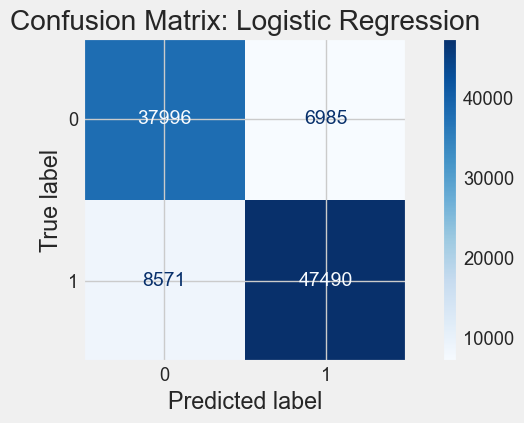

Processing Decision Tree ...
	Model: Decision Tree
	Accuracy: 0.8821777082797253
	Precision: 0.9022519403855264
	Recall: 0.8833413603039546
	F1 Score: 0.8926965127493307
	Training Time (s): 8.253815174102783
	Prediction Time (s): 0.06346678733825684


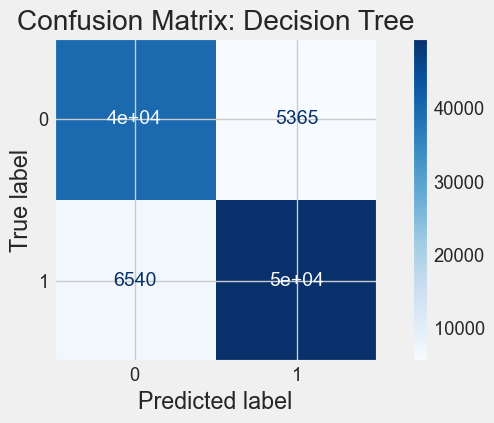

Processing Random Forest ...
	Model: Random Forest
	Accuracy: 0.9334633122859801
	Precision: 0.8956281874458736
	Recall: 0.9961648918142737
	F1 Score: 0.9432250981716843
	Training Time (s): 162.00519514083862
	Prediction Time (s): 5.732885360717773


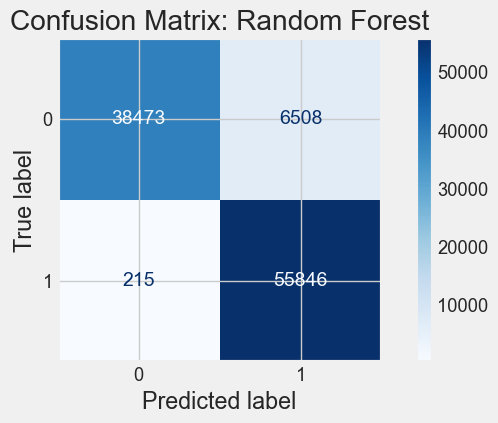

Processing KNN ...
	Model: KNN
	Accuracy: 0.8893826329645098
	Precision: 0.8959700755169737
	Recall: 0.905799040331068
	F1 Score: 0.9008577485652448
	Training Time (s): 6.432359457015991
	Prediction Time (s): 114.37278580665588


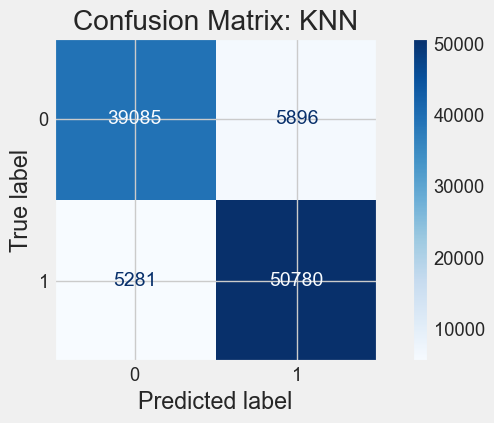

Processing Xgboost ...
	Model: Xgboost
	Accuracy: 0.932483521703846
	Precision: 0.8958182607437418
	Recall: 0.9938995023278214
	F1 Score: 0.9423135464231355
	Training Time (s): 2.7432022094726562
	Prediction Time (s): 0.13649606704711914


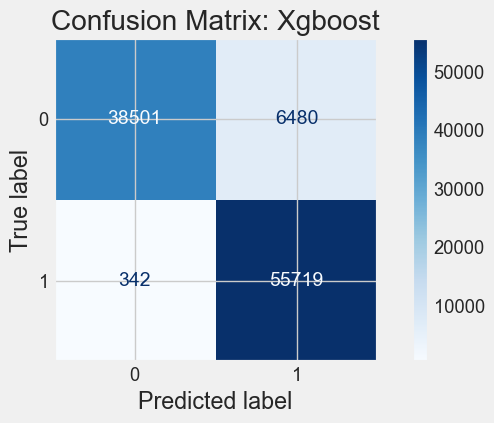

Processing SVM_SGD ...
	Model: SVM_SGD
	Accuracy: 0.8498050315710298
	Precision: 0.8735086148617786
	Recall: 0.8527853588055868
	F1 Score: 0.863022600909813
	Training Time (s): 1.4864780902862549
	Prediction Time (s): 0.01586771011352539


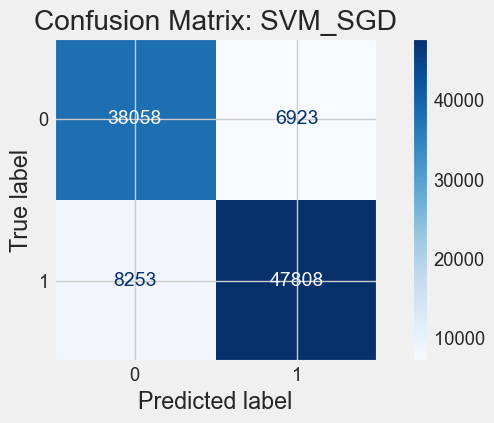

In [84]:
# Initialize lists to store ROC data
roc_data = {}

# Train, evaluate, and collect ROC curve data
model_results = []

pd.set_option('display.float_format', lambda x: '%.6f' % x)

for model_name, model in models.items():
    print(f'Processing {model_name} ...')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train)
    train_time = time.time() - start_time

    # Measure prediction time
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    predict_time = time.time() - start_time
    
    # Get probabilities for ROC curve if available
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test_scaled)
    else:
        y_prob = None
    
    # Evaluate metrics
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Training Time (s)": train_time,
        "Prediction Time (s)": predict_time
    }
    for key, value in metrics.items():
        print(f'\t{key}: {value}')
    model_results.append(metrics)
    print('==================================================')
    
    # Collect ROC curve data
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        roc_data[model_name] = (fpr, tpr, roc_auc)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_ if hasattr(model, "classes_") else [0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    filename = f"images/ConfusionMatrix_{model_name}.png"
    plt.savefig(filename,bbox_inches = 'tight')
    plt.show()

# Convert results to DataFrame
model_results_df = pd.DataFrame(model_results)

In [85]:
model_results_df

,Model,Accuracy,Precision,Recall,F1 Score,Training Time (s),Prediction Time (s)
0,Logistic Regression,0.846044,0.871776,0.847113,0.859268,0.640631,0.012023
1,Decision Tree,0.882178,0.902252,0.883341,0.892697,8.253815,0.063467
2,Random Forest,0.933463,0.895628,0.996165,0.943225,162.005195,5.732885
3,KNN,0.889383,0.895970,0.905799,0.900858,6.432359,114.372786
4,Xgboost,0.932484,0.895818,0.993900,0.942314,2.743202,0.136496
5,SVM_SGD,0.849805,0.873509,0.852785,0.863023,1.486478,0.015868


In [86]:
columns_to_select = ['Model','Accuracy', 'Precision','Recall','F1 Score']
metrics_df = model_results_df[columns_to_select]
metrics_df.set_index('Model', inplace=True)
metrics_df

,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.846044,0.871776,0.847113,0.859268
Decision Tree,0.882178,0.902252,0.883341,0.892697
Random Forest,0.933463,0.895628,0.996165,0.943225
KNN,0.889383,0.895970,0.905799,0.900858
Xgboost,0.932484,0.895818,0.993900,0.942314
SVM_SGD,0.849805,0.873509,0.852785,0.863023


<Figure size 1200x1000 with 0 Axes>

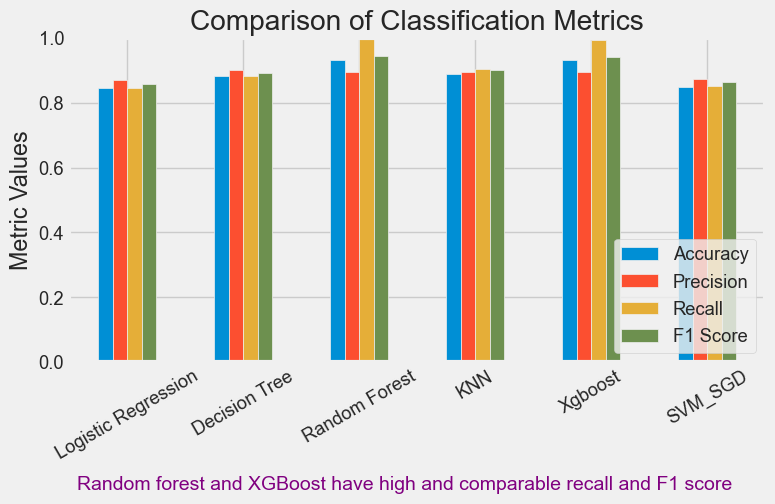

In [87]:
# Compare the matrices graphically
plt.figure(figsize=(12, 10))
metrics_df.plot(kind='bar')
plt.xticks(rotation=30)
plt.xlabel('')
plt.ylabel('Metric Values')
plt.title('Comparison of Classification Metrics')
plt.legend(loc='lower right')
plt.ylim(0, 1)
plt.figtext(0.5, -0.25, "Random forest and XGBoost have high and comparable recall and F1 score", ha="center", fontsize=14, color="purple")
plt.savefig("images/ClassificationMetricComparision.png",bbox_inches = 'tight')
plt.show()

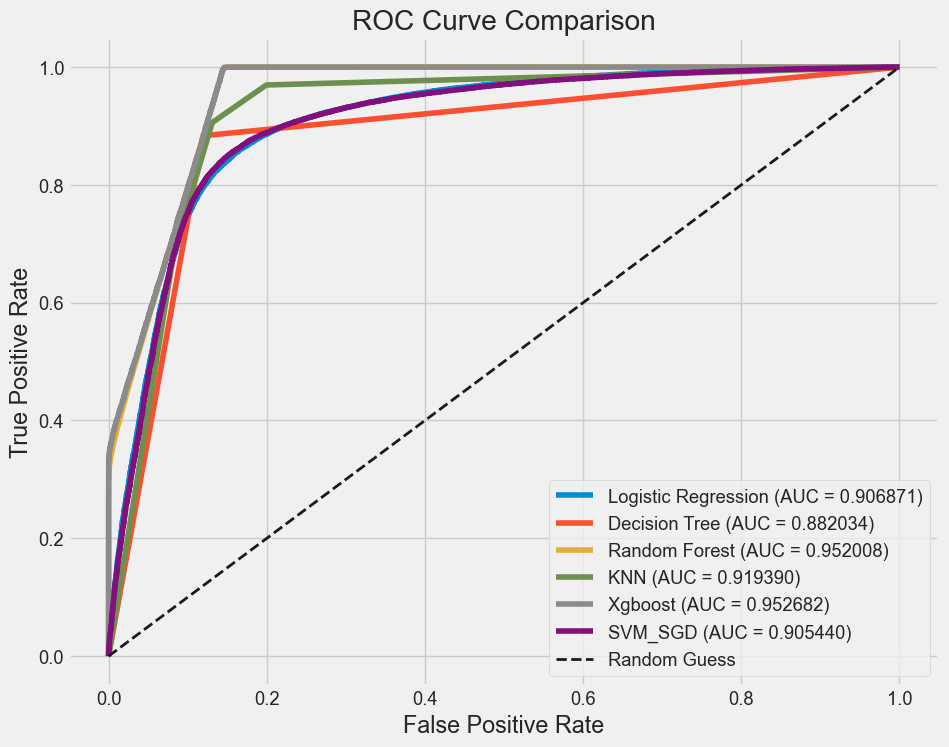

In [88]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for model_name, roc_values in roc_data.items():
    fpr, tpr, roc_auc = roc_values
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.6f})")
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.savefig("images/ROCCurveComparision.png",bbox_inches = 'tight')
plt.show()

<div style='background-color: Lavender; color: DarkBlue'> <b> << Interpreting ROC Curve >></Insights> </b> </div>
<div style='background-color: Lavender'><br>   
    
* Random Forest and XGBoost ROC curves are closer to top left corner showing better model performance.

* Also, higher AUC value (closer to 1) for Random forest and XGBoost indicates they are better classifier in this case.

<br>
</div>

## <div style='color: Magenta'>Hyperparameter Tuning and Cross-Validation </div>

In [91]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [92]:
# Hyperparameter grids for models
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean']
    },
    'Decision Tree' : {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Xgboost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'learning_rate': [0.1, 0.05, 0.01]
    }
}

In [93]:
# Initialize the best models dictionary
best_models = {}

# Perform grid search for each model
for model_name, params in param_grids.items():
    print(f"Tuning {model_name}...")
    if model_name == 'KNN':
        model = KNeighborsClassifier()
    elif model_name == 'Decision Tree':
        model = DecisionTreeClassifier()
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(random_state=42)
    elif model_name == 'Xgboost':
        model = XGBClassifier(random_state=42)
    # elif model_name == 'SVM':
    #     model = SVC(random_state=42)

    # # Set up GridSearchCV
    # grid_search = GridSearchCV(
    #     estimator=model,
    #     param_grid=params,
    #     scoring='accuracy',
    #     cv=5,
    #     verbose=1, n_jobs=-1        
    # )

    # Set up RandomizedSearchCV
    grid_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=20,
        scoring='accuracy',
        cv=5,
        verbose=1, 
        n_jobs=-1        
    )

    # Fit the grid search
    grid_search.fit(X_train_scaled, y_train)

    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy score for {model_name}: {grid_search.best_score_}\n")



Tuning KNN...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for KNN: {'weights': 'distance', 'n_neighbors': 7, 'metric': 'euclidean'}
Best accuracy score for KNN: 0.9001494468292688

Tuning Decision Tree...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Decision Tree: {'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 7}
Best accuracy score for Decision Tree: 0.9253570363610187

Tuning Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': None}
Best accuracy score for Random Forest: 0.9353925662109888

Tuning Xgboost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Xgboost: {'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.1}
Best accuracy score for Xgboost: 0.9361472102123123



## <div style='color: Magenta'>Recommendations and Conclusions </div>
- The Random Forest model has demonstrated the best overall metrics in this analysis, making it a reliable tool for predicting the churn of customer.
- XGBoost also have great metrices and is comparable to Random forest.
- The model performs good and makes correct predictions in most cases.
- While the model is performing good, there is still a significant rate of false negatives, which means it is not correctly identifying some churns.
<br></br>

## <div style='color: Magenta'>Next steps </div>

*   Use Neural networrk to see if we can get better results

